In [5]:
!pip install pandas
!pip install missingno
!pip install seaborn
!pip install matplotlib
!pip install numpy;

In [6]:
# Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [7]:
# Load training data
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Dimensions of training data
data.shape

(5110, 12)

In [9]:
# Explore columns
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# Check Datatypes
data.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [12]:
# Check for any null or missing values
data.isnull().values.any()

True

In [13]:
# Check missing values in each column of training data
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [14]:
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [15]:
data['smoking_status'].unique().tolist()

['formerly smoked', 'never smoked', 'smokes', 'Unknown']

In [16]:
# Make a copy of data
train_data = data.copy()

In [17]:
# Change data types of columns
for c in col_list:
    if c != 'smoking_status':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [18]:
# Compare Actual and Encoded labels
for c in col_list:
    if c != 'smoking_status':
        print('column:', c)
        print(data[c].unique().tolist())
        print(train_data[c].unique().tolist(), '\n')

column: gender
['Male', 'Female', 'Other']
[1, 0, 2] 

column: ever_married
['Yes', 'No']
[1, 0] 

column: work_type
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
[2, 3, 0, 4, 1] 

column: Residence_type
['Urban', 'Rural']
[1, 0] 



In [19]:
train_data['smoking_status'].head()

,smoking_status
0,formerly smoked
1,never smoked
2,never smoked
3,smokes
4,never smoked


In [20]:
count_replaced = (train_data['smoking_status'] == -1).sum()
print(f"Count of replaced 'unknown' values: {count_replaced}")

Count of replaced 'unknown' values: 0


In [21]:
train_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [22]:
# Deal with Missing Values

missing_vals = train_data['bmi'].isnull().sum()
observed_vals = train_data.loc[train_data['bmi'].notnull(), 'bmi']
train_data.loc[train_data['bmi'].isnull(), 'bmi'] = observed_vals.mean()

In [23]:
train_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [24]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,never smoked,1


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
smoking_mapping = {
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': None,
}
train_data['smoking_status'] = train_data['smoking_status'].map(smoking_mapping)

In [27]:
train_data['smoking_status'].isnull().sum()

1544

In [28]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1.0,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,0.0,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,0.0,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,2.0,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,0.0,1


In [29]:
print(data['smoking_status'].unique().tolist())
print(train_data['smoking_status'].unique().tolist(), '\n')

['formerly smoked', 'never smoked', 'smokes', 'Unknown']
[1.0, 0.0, 2.0, nan] 



In [30]:
# train_data['smoking_status'] = train_data['smoking_status'].astype(int)

In [31]:
features = train_data.drop(columns=['id', 'smoking_status'])
target = train_data['smoking_status']

In [32]:
X_train = features[target.notna()]
y_train = target[target.notna()]

In [33]:
y_train

,smoking_status
0,1.0
1,0.0
2,0.0
3,2.0
4,0.0
...,...
5102,0.0
5105,0.0
5106,0.0
5107,0.0


In [34]:
from sklearn import linear_model

# model = linear_model.LinearRegression()
# model.fit(X, y_encoded)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# from sklearn import linear_model

# # Regression, another method to impute missing values

# X = train_data[train_data['smoking_status'].isnull()]
# y = train_data.loc[train_data['smoking_status'].isnull(), 'smoking_status']

# X = X.drop(columns=['smoking_status'])

# print(X.shape, y.shape)

In [37]:
missing_mask = train_data['smoking_status'].isna()
X_missing = features[missing_mask]
predicted_values = model.predict(X_missing)

In [38]:
train_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [39]:
train_data.loc[train_data['smoking_status'].isna(), 'smoking_status'] = predicted_values

In [40]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1.0,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,0.0,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,0.0,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,2.0,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,0.0,1


In [41]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   float64
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(4), int8(4)
memory usage: 339.5 KB
None


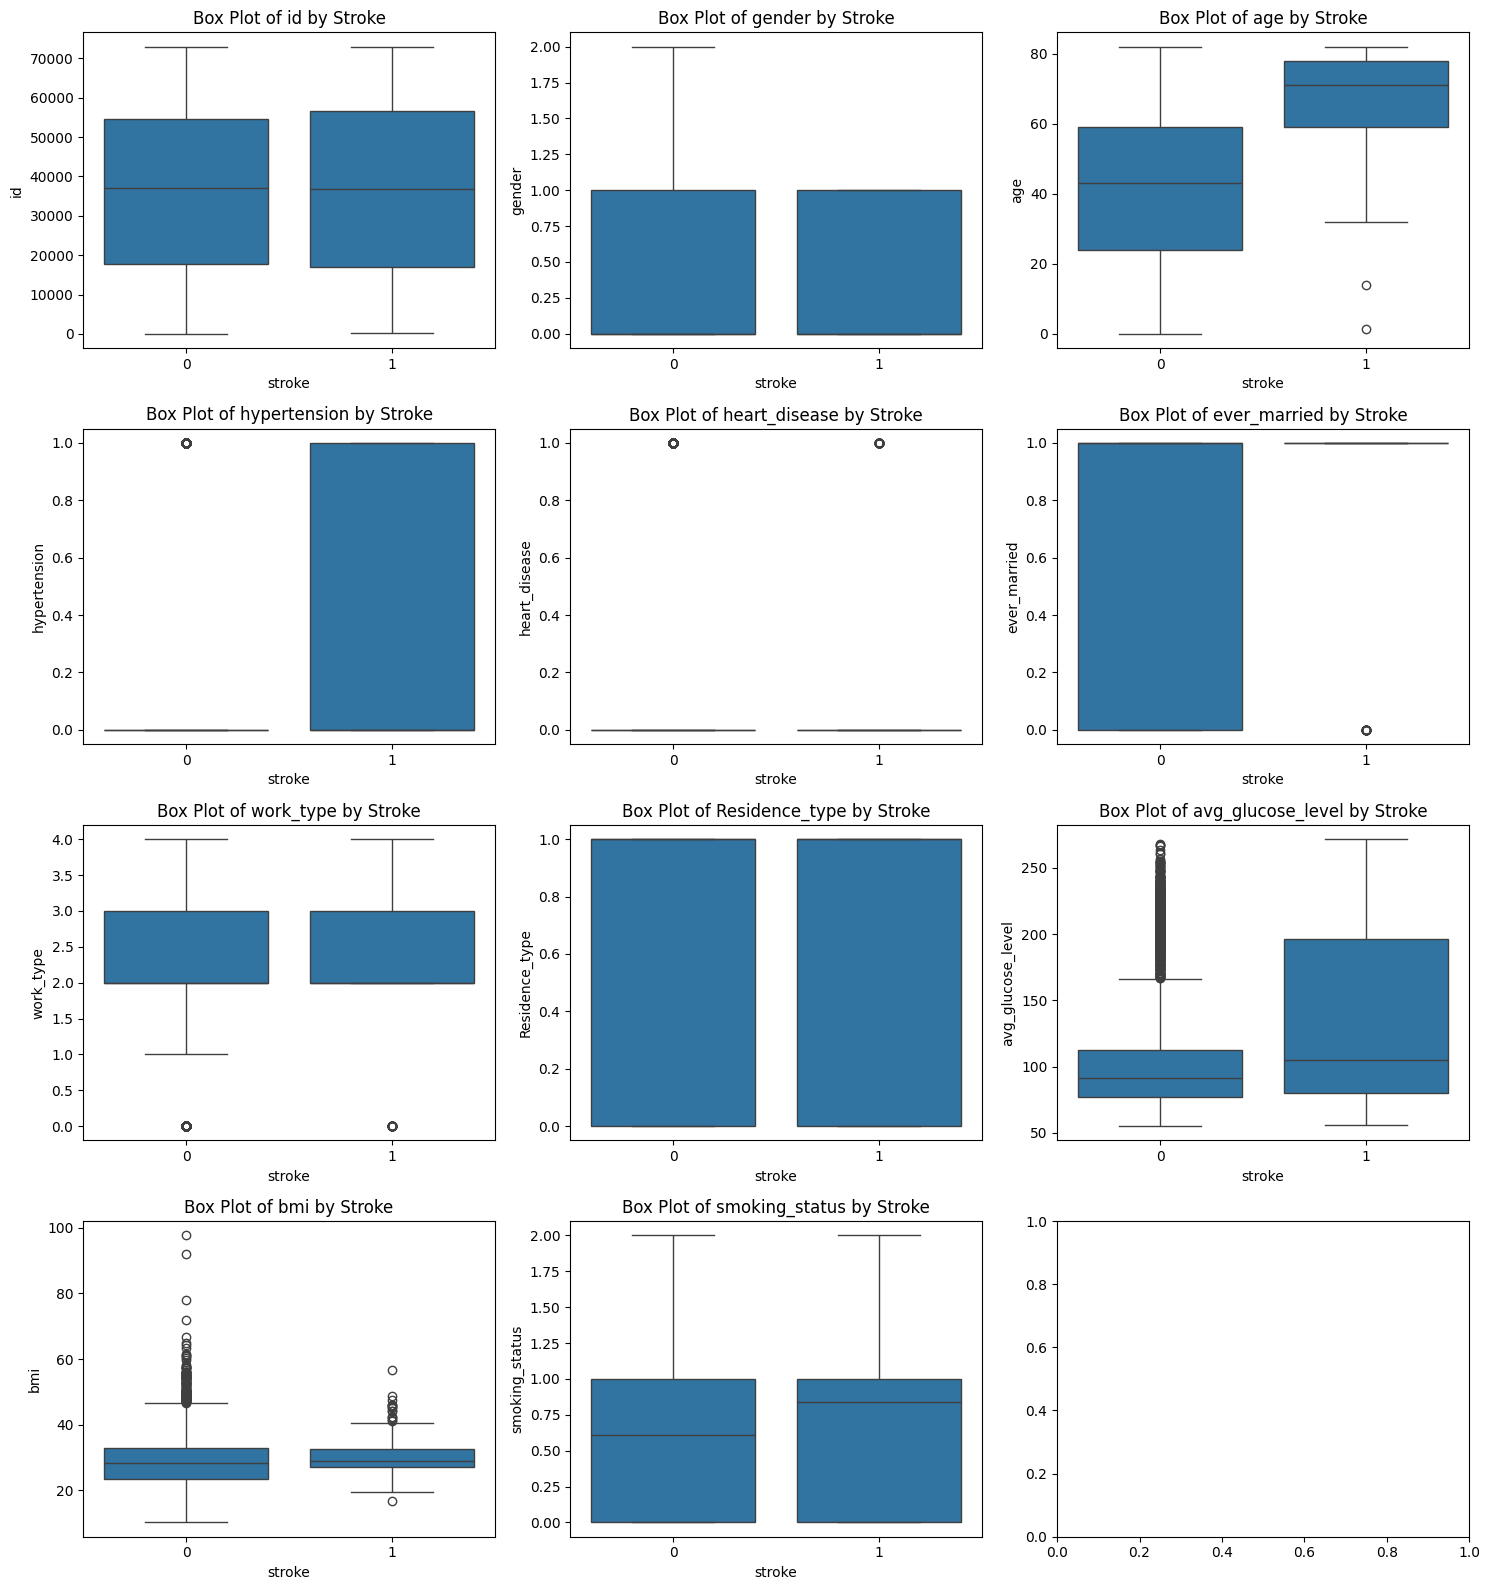

In [42]:
num_cols = 3
num_rows = (len(train_data.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, c in enumerate(train_data.columns):
    if c != "stroke":
        sns.boxplot(x='stroke', y=c, data=train_data, ax=axes[i])
        axes[i].set_title(f'Box Plot of {c} by Stroke')

plt.tight_layout()
plt.show()

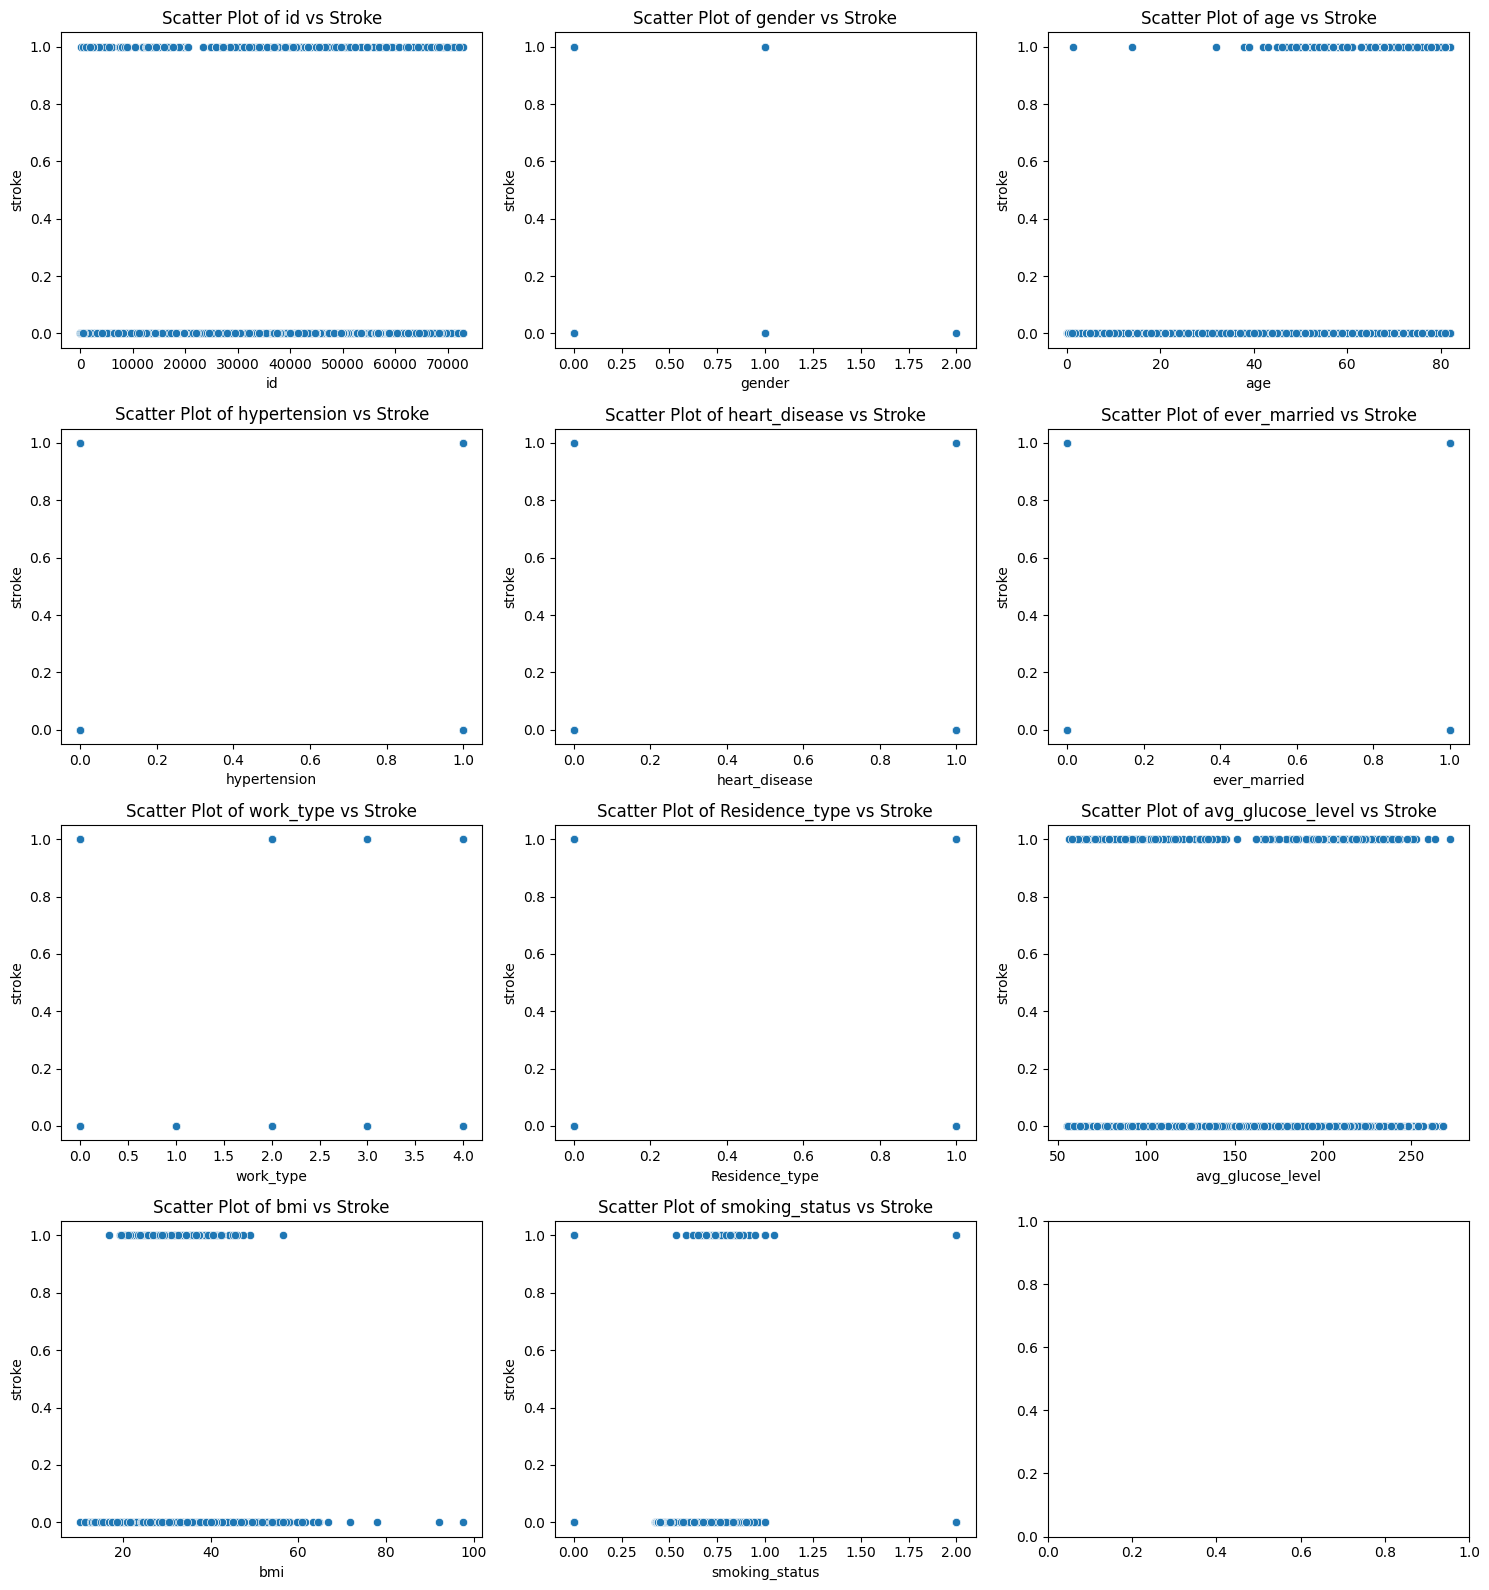

In [43]:
num_cols = 3
num_rows = (len(train_data.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, c in enumerate(train_data.columns):
    if c != "stroke":
        sns.scatterplot(x=train_data[c], y=train_data['stroke'], ax=axes[i])
        axes[i].set_title(f'Scatter Plot of {c} vs Stroke')

plt.tight_layout()
plt.show()

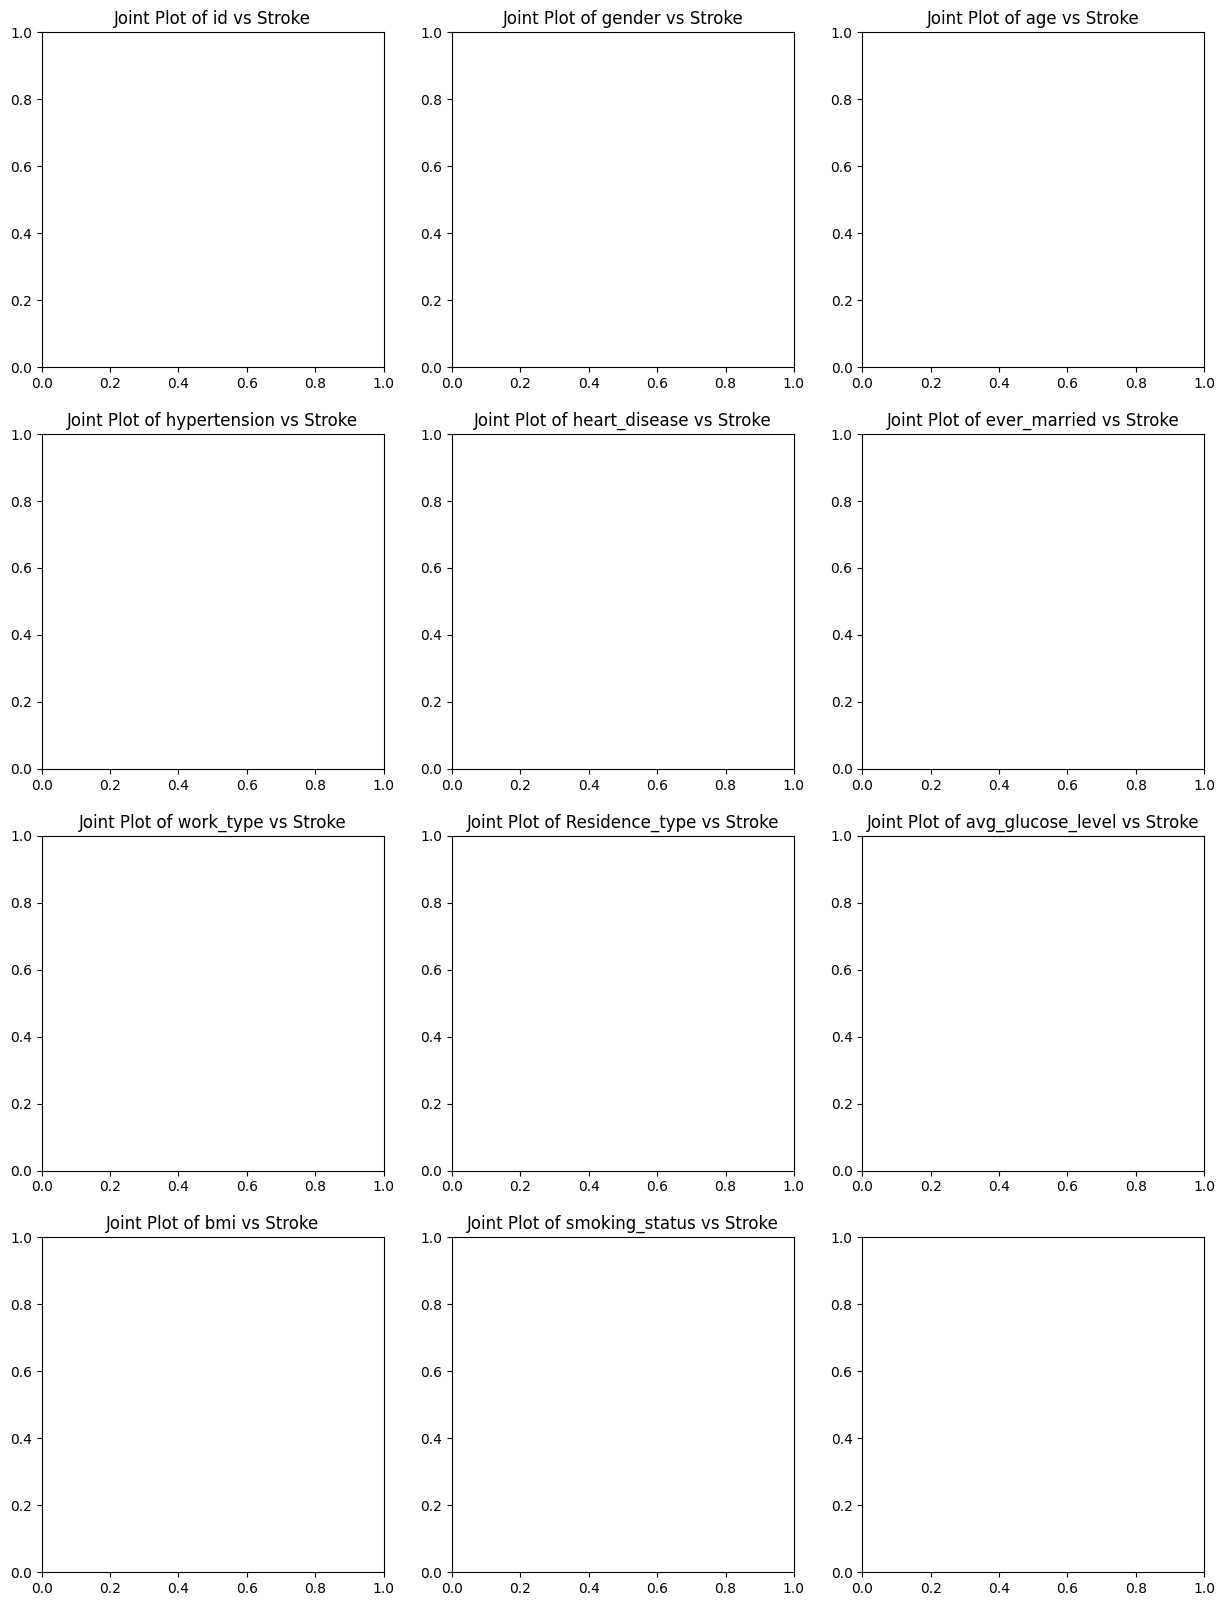

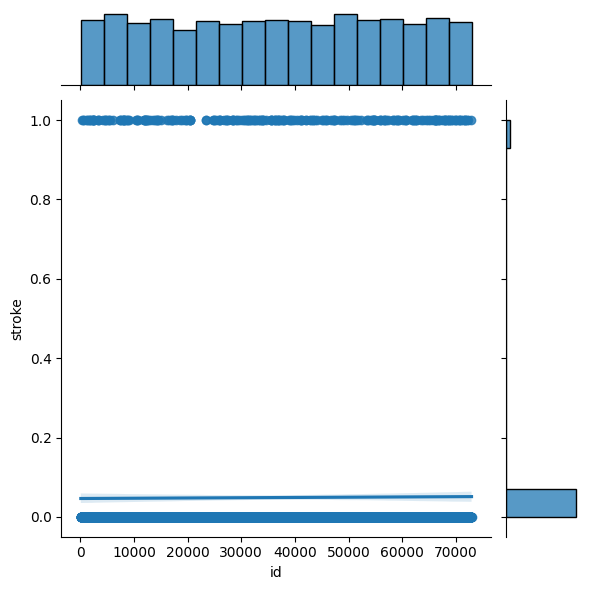

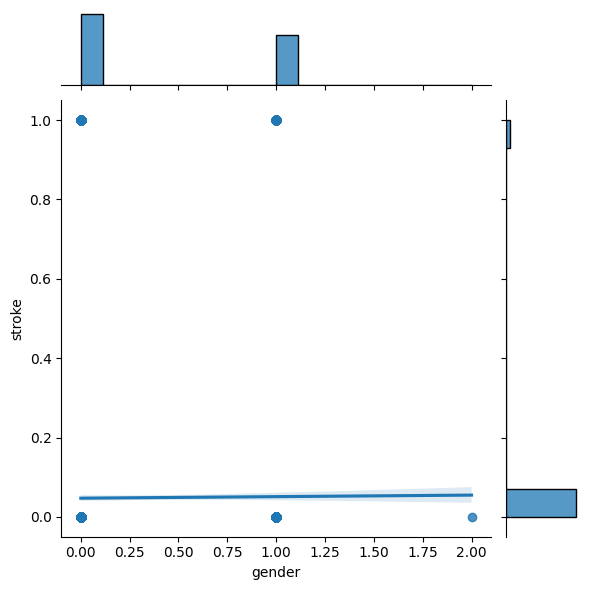

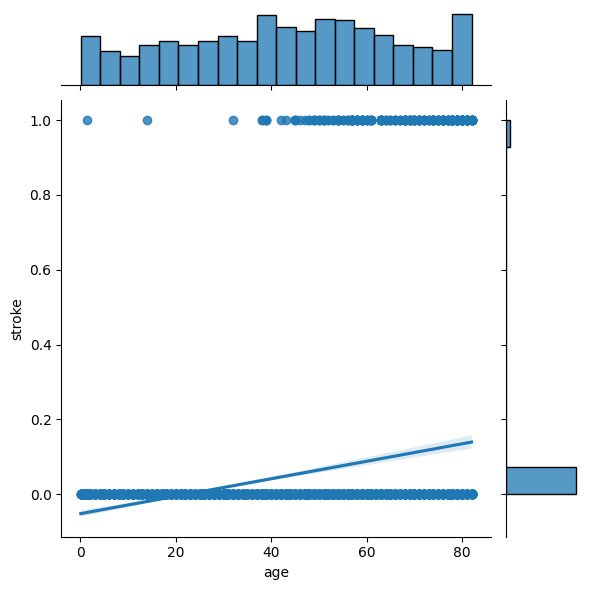

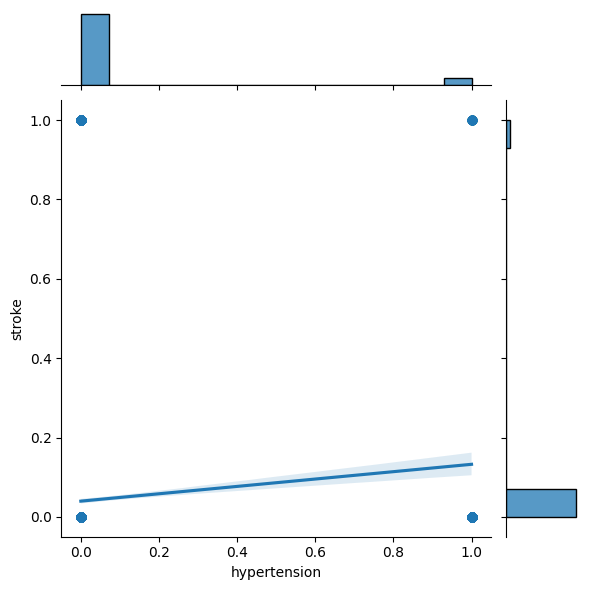

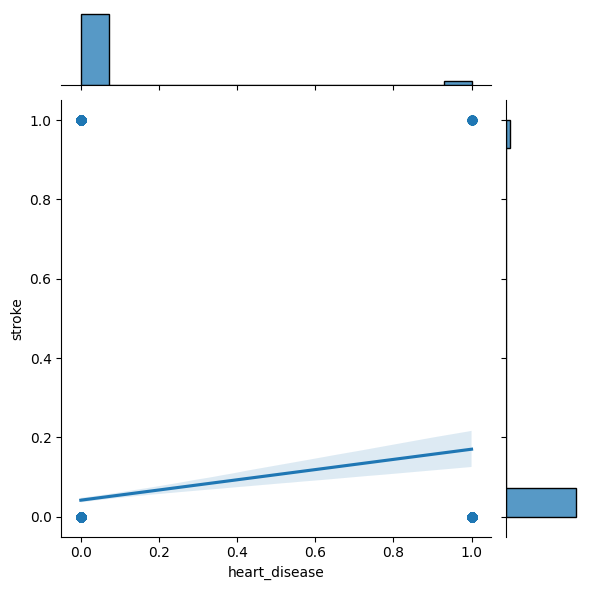

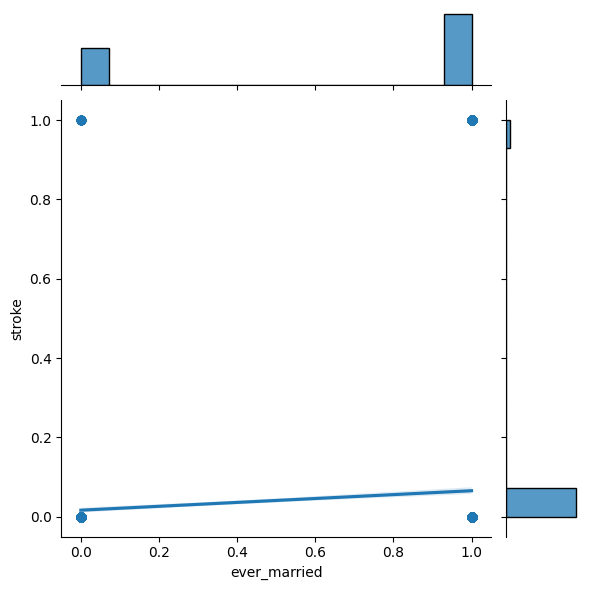

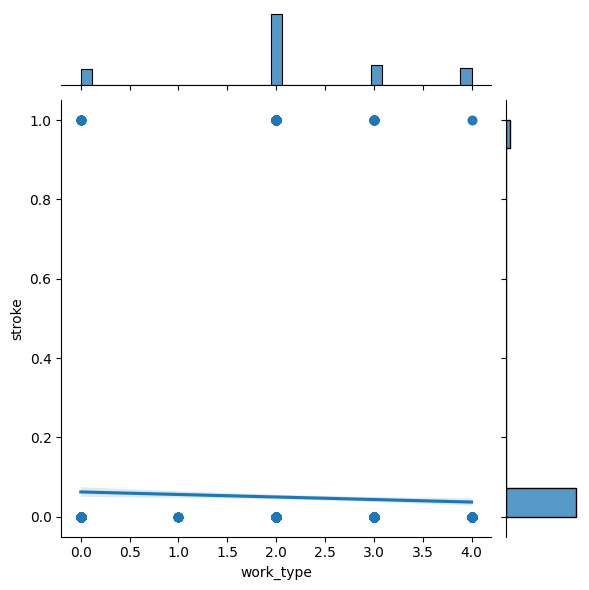

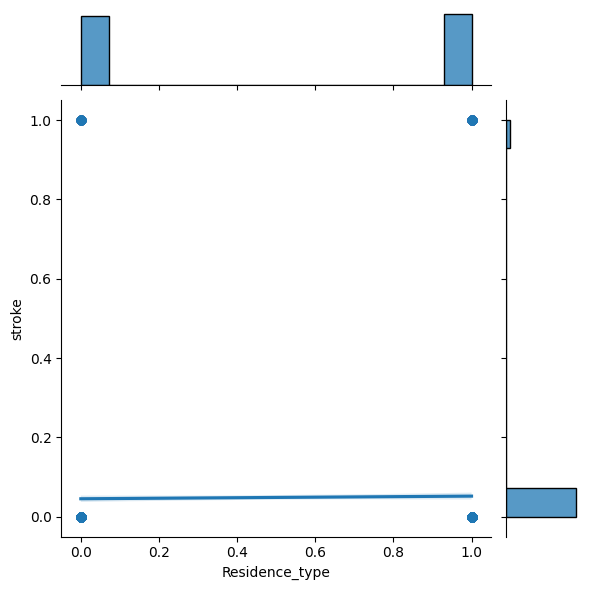

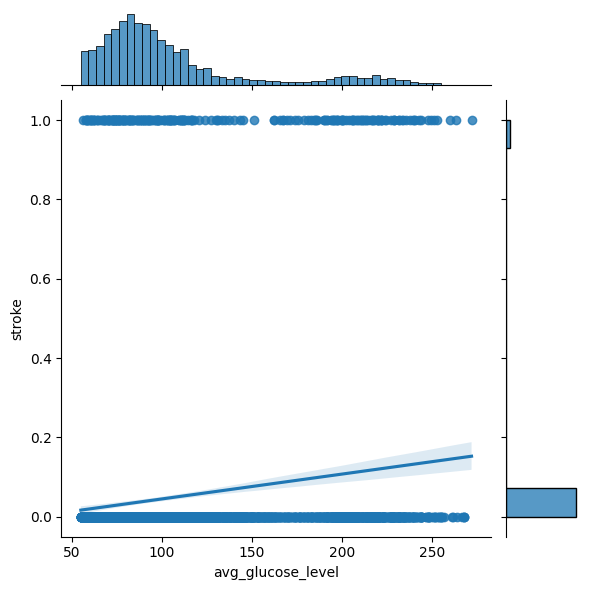

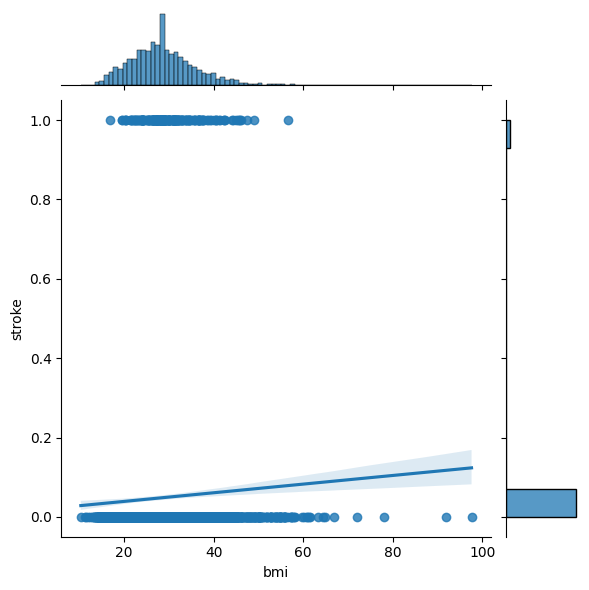

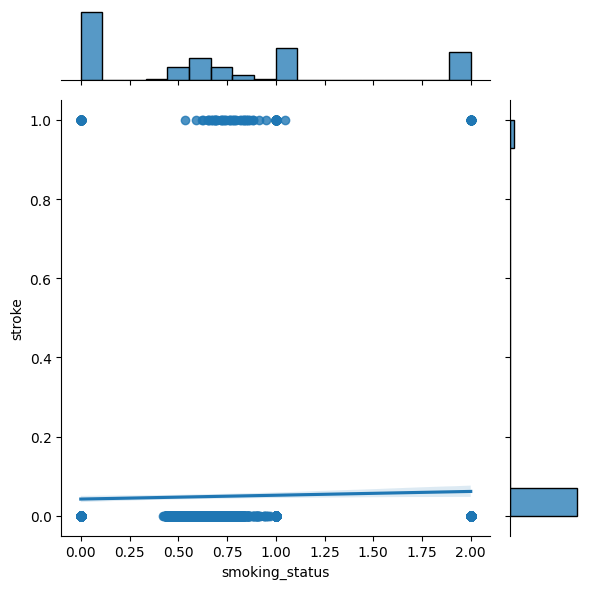

In [44]:
cols = train_data.columns.values
num_cols = 3
num_rows = (len(cols) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, c in enumerate(cols):
    if c != "stroke":
        train_data[c] = pd.to_numeric(train_data[c], errors='coerce')
        g = sns.JointGrid(data=train_data, x=c, y="stroke")
        g.plot(sns.regplot, sns.histplot)
        axes[i].set_title(f'Joint Plot of {c} vs Stroke')

# Hide any unused axes
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



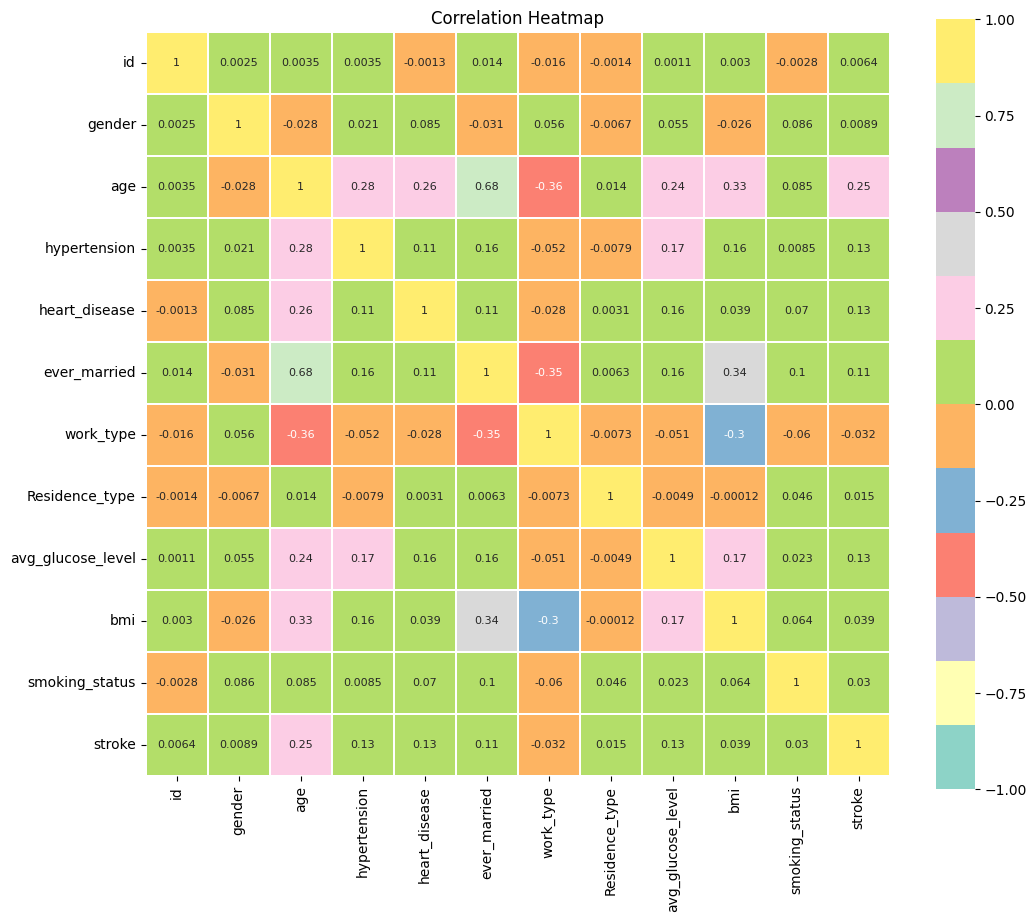

In [45]:
corr = train_data.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr,
            cmap='Set3', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

plt.title('Correlation Heatmap')
plt.show()

In [46]:
data['stroke'].value_counts().get(0)

4861

<ipython-input-47-56c4cb88c06f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['stroke'])


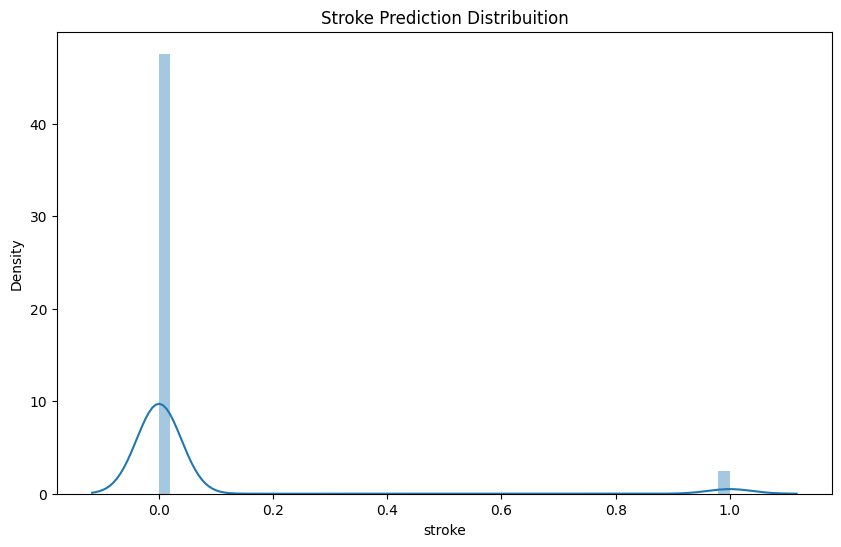

In [47]:
# distribution plot of target variable (stroke)
plt.figure(figsize = (10, 6))
plt.title('Stroke Prediction Distribuition')
sns.distplot(train_data['stroke'])
plt.show()

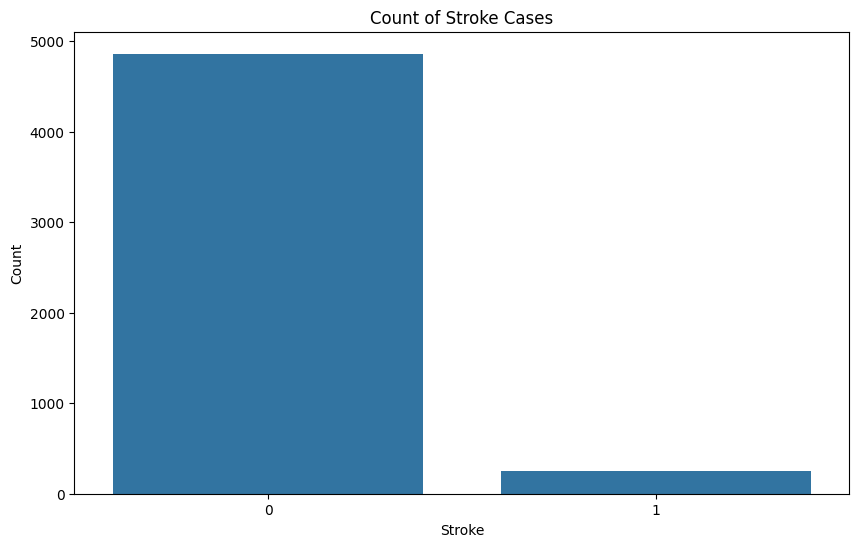

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stroke', data=train_data)
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [49]:
# Fetures age and ever_married are highly correlated.
# Remove ever_married and keep age only

train_data = train_data.drop(columns=['id', 'ever_married'])
train_data.shape

(5110, 10)

In [50]:
# Standardize data
from sklearn.preprocessing import StandardScaler

# Columns not to be standardized. These are columns with categorical data,
# also we don't standardize our target vraiable
cols = ['smoking_status']

# Pick remaining columns and standardize them
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])


In [51]:
# Train Test Split

from sklearn.model_selection import train_test_split
y = train_data['stroke']
X = train_data.drop(columns=['stroke'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (4088, 9)
Validation Set Dimensions: (1022, 9)


In [52]:
train_data['smoking_status'].isnull().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: smoking_status, Length: 5110, dtype: bool>

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 2382 to 1972
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   float64
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   float64
 3   heart_disease      4088 non-null   float64
 4   work_type          4088 non-null   float64
 5   Residence_type     4088 non-null   float64
 6   avg_glucose_level  4088 non-null   float64
 7   bmi                4088 non-null   float64
 8   smoking_status     4088 non-null   float64
dtypes: float64(9)
memory usage: 319.4 KB


In [54]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [55]:
# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))

Mean Absolute Error for Training Set: 0.15706566378785253
Mean Absolute Error for Test Set: 0.4032306429275822


In [56]:
import joblib

feature_names = ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

# Train the model
randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

# Save the model and feature names to a file
model_data = {
    'model': randomf,
    'feature_names': feature_names
}
model_filename = 'stroke_model.pkl'
joblib.dump(model_data, model_filename)


['stroke_model.pkl']

In [ ]:

# parameter grid for fine-tuning random forest regressor
# you can take a look at scikit-learn official documentation
# where you'll find the parameters of random forest regressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12],
          'max_features': [2, 4, 6],
          'min_samples_leaf': [3, 4, 5],
          'min_samples_split': [8, 10, 12],
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [ ]:
import sklearn.metrics as metrics